Ширина головної пелюстки (ШГП): 0 градусів
Табл. 1 - Значення мінімальних кутів для FH
------------------------------
| № |  θ  |FH(θ)|
| 1 |2.35| 0.00|
| 2 |4.19| 0.00|
| 3 |6.00| 0.00|
| 4 |7.84| 0.00|
| 5 |9.69| 0.00|
| 6 |11.55| 0.00|
| 7 |13.44| 0.00|
| 8 |15.33| 0.00|
| 9 |17.24| 0.00|
| 10 |19.16| 0.00|
| 11 |21.11| 0.00|
| 12 |23.09| 0.00|
| 13 |25.10| 0.00|
| 14 |27.14| 0.00|
| 15 |29.23| 0.00|
| 16 |31.33| 0.00|
| 17 |33.51| 0.00|
| 18 |35.74| 0.00|
| 19 |38.03| 0.00|
| 20 |40.41| 0.00|
| 21 |42.85| 0.00|
| 22 |45.41| 0.00|
| 23 |48.07| 0.00|
| 24 |50.90| 0.00|
| 25 |53.91| 0.00|
| 26 |57.15| 0.00|
| 27 |60.69| 0.00|
| 28 |64.69| 0.00|
| 29 |69.41| 0.00|
| 30 |75.47| 0.00|
------------------------------
Табл. 2 - Значення мінімальних кутів для FE
------------------------------
| № |  θ  |FE(θ)|
| 1 |2.71| 0.00|
| 2 |4.37| 0.00|
| 3 |6.15| 0.00|
| 4 |7.95| 0.00|
| 5 |9.78| 0.00|
| 6 |11.62| 0.00|
| 7 |13.49| 0.00|
| 8 |15.38| 0.00|
| 9 |17.27| 0.00|
| 10 |19.20| 0.00|
| 11 |21

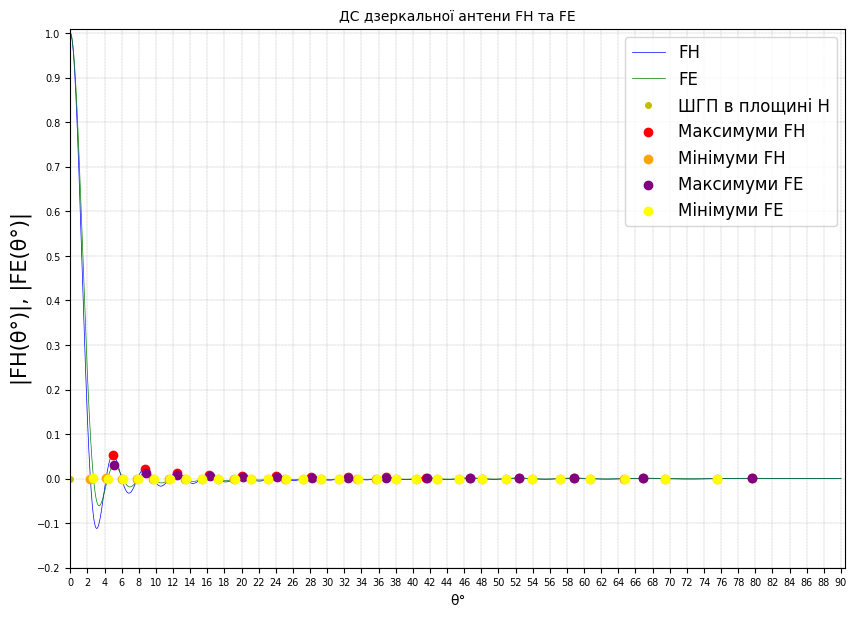

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import jv

FH = []
FE = []
DS = []
steps = []
lambd = 0.032
D = 0.9
focus = 0.4

k = 2*np.pi/lambd
R0 = 0.5
p = 0.9

# Кутовий простір
theta = np.linspace(-np.pi/2, np.pi/2, 10000)

v = 3.5 * R0/p
u = k * R0 * np.sin(theta)

FH = np.cos(theta/2)**2 * (0.74 * (v * jv(1, v) * jv(0, u) - u * jv(1, u) * jv(0, v)) / (v**2 - u**2) + 0.26 * jv(1,u)/u - 0.25 * (u * jv(1,u)*jv(2, 1.5*v) - 1.5*v*jv(1, 1.5*v) * jv(2,u))/((1.5*v)**2 - u**2)) * 1/(0.74 * jv(1,v)/v + 0.13)

sgp = 0
y = 0

for i in range(1, len(FH) - 1):
    if 0.707 < FH[i] < 0.708 and math.degrees(theta[i]) > 0:
        sgp = math.degrees(theta[i]) * 2
        y = FH[i]
        break
if sgp is not None:
    print(f"Ширина головної пелюстки (ШГП): {sgp} градусів")
else:
    print("Ширина головної пелюстки (ШГП) не знайдена.")    
FE = np.cos(theta/2)**2 * (0.74 * (v * jv(1, v) * jv(0, u) - u * jv(1, u) * jv(0, v)) / (v**2 - u**2) + 0.26 * jv(1,u)/u + 0.25 * (u * jv(1,u)*jv(2, 1.5*v) - 1.5*v*jv(1, 1.5*v) * jv(2,u))/((1.5*v)**2 - u**2)) * 1/(0.74 * jv(1,v)/v + 0.13)

# Знаходження максимумів та мінімумів
# Знаходження максимумів та мінімумів для FH
maxima_FH = []
minima_FH = []
for i in range(1, len(FH) - 1):
    if FH[i] > FH[i - 1] and FH[i] > FH[i + 1]:
        maxima_FH.append(i)
    elif abs(FH[i]) < abs(FH[i - 1]) and abs(FH[i]) < abs(FH[i + 1]):
        minima_FH.append(i)

# Знаходження максимумів та мінімумів для FE
maxima_FE = []
minima_FE = []
for i in range(1, len(FE) - 1):
    if FE[i] > FE[i - 1] and FE[i] > FE[i + 1]:
        maxima_FE.append(i)
    elif abs(FE[i]) < abs(FE[i - 1]) and abs(FE[i]) < abs(FE[i + 1]):
        minima_FE.append(i)
        
# Конвертація theta в градуси для графіка
theta_degrees = np.degrees(theta)

# Побудова графіка
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(theta_degrees, FH, label='FH', color='blue', linewidth=0.5)
ax.plot(theta_degrees, FE, label='FE', color='green', linewidth=0.5)

ax.plot(sgp/2, y, 'oy',markersize=4, label="ШГП в площині H")

# Позначення максимумів та мінімумів на графіку
ax.scatter(theta_degrees[maxima_FH], FH[maxima_FH], color='red', label='Максимуми FH', zorder=5)
ax.scatter(theta_degrees[minima_FH], FH[minima_FH], color='orange', label='Мінімуми FH', zorder=5)
ax.scatter(theta_degrees[maxima_FE], FE[maxima_FE], color='purple', label='Максимуми FE', zorder=5)
ax.scatter(theta_degrees[minima_FE], FE[minima_FE], color='yellow', label='Мінімуми FE', zorder=5)

print("Табл. 1 - Значення мінімальних кутів для FH")
print("------------------------------")
print("| № |  θ  |FH(θ)|")
m = 1
for i in minima_FH:
    if theta_degrees[i] > 0:
        print(f"| {m} |{theta_degrees[i]:.2f}| {abs(FH[i]):.2f}|")
        m += 1
print("------------------------------")

print("Табл. 2 - Значення мінімальних кутів для FE")
print("------------------------------")
print("| № |  θ  |FE(θ)|")
m = 1
for i in minima_FE:
    if theta_degrees[i] > 0:
        print(f"| {m} |{theta_degrees[i]:.2f}| {abs(FE[i]):.2f}|")
        m += 1
print("------------------------------")

print("Табл. 3 - Значення максимальних кутів для FH")
print("------------------------------")
print("| № |  θ  |FH(θ)|")
m = 1
for i in maxima_FH:
    if theta_degrees[i] > 0:
        print(f"| {m} |{theta_degrees[i]:.2f}| {abs(FH[i]):.2f}|")
        m += 1
print("------------------------------")

print("Табл. 4 - Значення максимальних кутів для FE")
print("------------------------------")
print("| № |  θ  |FE(θ)|")
m = 1
for i in maxima_FE:
    if theta_degrees[i] > 0:
        print(f"| {m} |{theta_degrees[i]:.2f}| {abs(FE[i]):.2f}|")
        m += 1
print("------------------------------")

ax.set_xlabel('θ' + '\u00b0', fontsize=10)
ax.set_ylabel('|FH(θ' + '\u00b0' + ')|, |FE(θ' + '\u00b0' + ')|', fontsize=15)
plt.xticks(np.arange(0, 100, 2), fontsize=7)
plt.yticks(np.arange(-0.2, 1.2, 0.1), fontsize=7)
plt.ylim(-0.2, 1.01)
plt.xlim(0, 90.5)
plt.legend(loc="upper right", fontsize=12)
plt.grid(which='both', linestyle='--', linewidth=0.2, color='gray')
plt.title('ДС дзеркальної антени FH та FE', fontsize=10)
plt.show()